## описание задачи

В данном исследовании нам предоставленны данные об активности пользователей их покупках на торговой площадке и суммах потраченных на продвижение товаров на этой площадке по нескольким источникам. Нам необходимо выяснить эффективность этих рекламных коипаний и дать предложения по выбору наиболее эффективных.

## Иморт данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns



visits=pd.read_csv('/datasets/visits_log.csv')
orders=pd.read_csv('/datasets/orders_log.csv')
costs=pd.read_csv('/datasets/costs.csv')

## проверка данных

### визиты

In [2]:
visits.info()
display(visits.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
207646,desktop,2018-01-28 16:56:00,1,2018-01-28 16:51:00,6421755886386105700
348032,desktop,2017-07-03 19:04:00,3,2017-07-03 19:02:00,12611609278261049890
226402,desktop,2017-07-10 15:02:00,2,2017-07-10 14:58:00,78680889589429334
16416,touch,2018-02-22 22:23:00,5,2018-02-22 22:11:00,10497289254765936757
93536,touch,2017-06-28 21:05:00,2,2017-06-28 20:53:00,7241147358305331734
170257,touch,2018-04-15 22:05:00,4,2018-04-15 21:16:00,5675475218445518231
240128,touch,2018-02-20 19:07:00,10,2018-02-20 18:58:00,14093504577387329284
116694,desktop,2018-04-13 11:44:00,2,2018-04-13 11:34:00,16446721728577980419
316493,desktop,2017-11-28 20:38:00,4,2017-11-28 20:38:00,7676268390189823303
19367,desktop,2018-05-08 19:17:00,2,2018-05-08 19:08:00,9896602048009611890


Пустых значений нет, столбцы с датами нужно привести к типу данных дата. Поскольку я очень не люблю имена столбцов с пробелами, переименую их так, что-бы не было пробелов.

In [3]:
visits=visits.rename(columns={'End Ts':'End_ts','Start Ts':'Start_ts','Source Id':'Source_id'})

visits.End_ts=pd.to_datetime(visits.End_ts)
visits.Start_ts=pd.to_datetime(visits.Start_ts)

посмотрим на диапазоны данных в столбцах

In [4]:
print(visits.Device.unique())
print(' ')
print(visits.Start_ts.describe())
print(' ')
print(visits.End_ts.describe())

['touch' 'desktop']
 
count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: Start_ts, dtype: object
 
count                  359400
unique                 224760
top       2017-11-24 16:51:00
freq                       23
first     2017-06-01 00:02:00
last      2018-06-01 01:26:00
Name: End_ts, dtype: object


In [5]:
print('Дубликатов {}'.format(visits.duplicated().sum()))

Дубликатов 0


Дубликатов нет

In [6]:
print(visits.Device.unique())

['touch' 'desktop']


In [7]:
print(np.sort(visits.Source_id.unique()))

[ 1  2  3  4  5  6  7  9 10]


### заказы

In [8]:
orders.info()
display(orders.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
49169,2018-05-27 15:56:00,1.28,9895745858638216790
992,2017-06-08 14:41:00,0.98,2810945695042643148
41506,2018-03-24 12:26:00,0.49,17524370468859157580
16217,2017-11-05 12:46:00,2.08,12366547935369088293
20882,2017-11-29 11:47:00,3.67,9812239850697992410
10767,2017-10-05 11:26:00,2.44,5463250118135701715
16036,2017-11-03 22:41:00,2.44,208190148409794308
7313,2017-09-09 15:15:00,1.47,8000055088907556028
46619,2018-05-07 17:23:00,3.67,14360900736315422831
20683,2017-11-28 14:35:00,20.78,8225162639629365331


Пустых нет, заменю тип данных столбца Buy Ts на datatime и переименую, что-бы небыло пробелов

In [9]:
orders=orders.rename(columns={'Buy Ts':'Buy_ts'})

orders.Buy_ts=pd.to_datetime(orders.Buy_ts)

посмотрим на диапазоны данных в столбцах

In [10]:
print(orders.Revenue.describe())
print(' ')
print(orders.Buy_ts.describe())
print('Дубликатов {}'.format(orders.duplicated().sum()))

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: Revenue, dtype: float64
 
count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: Buy_ts, dtype: object
Дубликатов 0


### затраты

In [11]:
costs.info()
display(costs.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
970,3,2018-01-31,479.90
215,1,2018-01-02,70.96
346,1,2018-05-15,47.00
405,2,2017-07-13,88.51
2400,10,2018-01-08,20.44
2494,10,2018-04-14,8.97
1477,5,2017-06-26,111.47
1783,5,2018-04-29,83.78
1755,5,2018-03-31,0.70
284,1,2018-03-12,64.66


Пустых нет, заменю тип данных столбца dt на datatime

In [12]:
costs.dt=pd.to_datetime(costs.dt)

посмотрим на диапазоны данных в столбцах

In [13]:
print(costs.dt.describe())
print(' ')
print(costs.costs.describe())

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object
 
count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64


In [14]:
print(costs.source_id.unique())

[ 1  2  3  4  5  9 10]


### резюме

Данные проверенны. 
Интервалы дат соответсвуют.
 для визитов 
  начала сессий с 2017-06-01 00:01:00 по 2018-05-31 23:59:00
  конец сессий  с 2017-06-01 00:02:00 по 2018-06-01 01:26:00
 для заказов
  с 2017-06-01 00:10:00 по 2018-06-01 00:02:00
 для затрат
  с 2017-06-01 00:00:00 по 2018-05-31 00:00:00
  
В таблицу визиты есть две категории устройств пользователей. В принципе это столбец можно переделать в тип данных category, но он нигде в анализе не используется.

Источников трафика в визитах (1,2,3,4,5,6,7,9,10) больше чем в затратах (1,2,3,4,5,9,10), причем не факт, что для источников 6 и 7, которые есть в визитах есть заказы. Никак не могу прокомментировать это факт. В реальности я бы конечно задал вопрос тем, кто данные собирал.


## продуктовые метрики

Вычислю части даты, для удобства использования в дальнейшем

In [15]:
visits['Date_ts']=visits.Start_ts.dt.date.astype('datetime64')
visits['Month_ts']=visits.Start_ts.dt.month
visits['Week_ts']=visits.Start_ts.dt.week
visits['Year_ts']=visits.Start_ts.dt.year

### DAU WAU MAU

#### DAU

Считаем количество уникальных пользователей

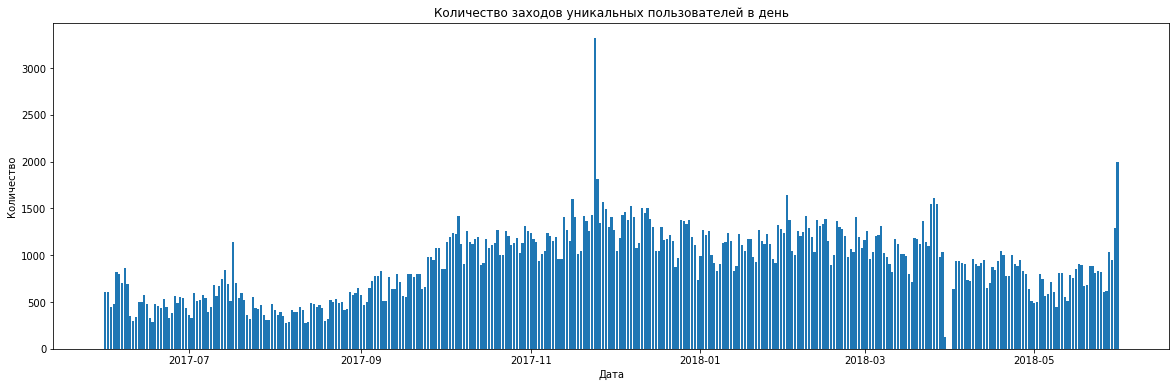

Среднее значение захода уникальных пользователей в день за весь период 908


In [16]:
dftmp=visits.groupby(['Date_ts']).agg({'Uid':'nunique'})

fig, ax = plt.subplots()
ax.bar(dftmp.index,height=dftmp.Uid)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.title('Количество заходов уникальных пользователей в день')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

print('Среднее значение захода уникальных пользователей в день за весь период {}'.format(round(dftmp.Uid.mean())))

В целом можно отметить общий рост популярности сервиса начиная с сентября 2017 и некоторое снижение после марта 2018. 
Также на графике видны регулярные снижения посещяемости. Несколько дней посещяемость высокая, затем два или три дня провал, скорее всего это корреляция с днями недели. 
С чем связан огромной выброс 24.11.2017 не могу сказать.

#### WAU

Здесь нам нужно посчитать количество активных пользователей в неделю. У нас есть номер недели, но сложность в том, что данные охватывают два года, а в каждом годе своя нумерация недель. Я создал специальное поле-счетчик, в котором слепил год и номер недели. Возможно это совсем не питоновский способ.

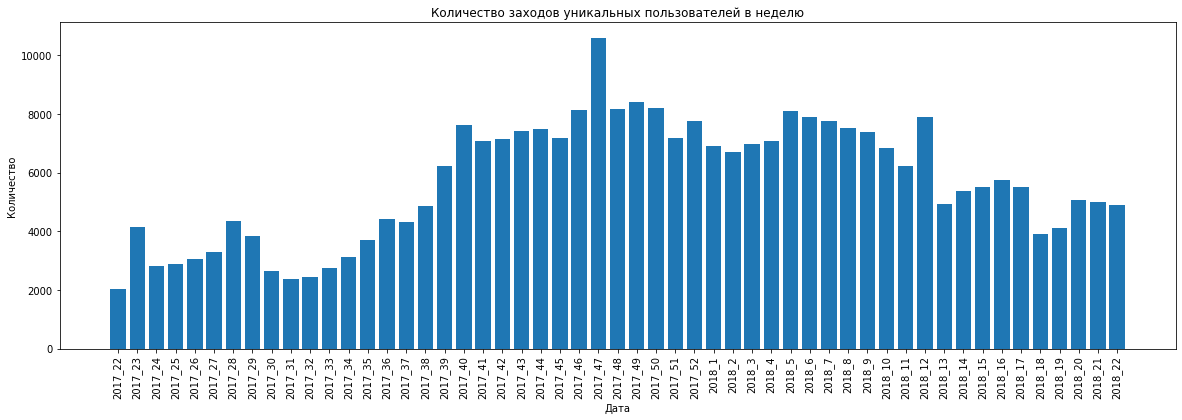

Среднее значение захода уникальных пользователей в неделю за весь период 5716


In [17]:
dftmp=visits.groupby(['Year_ts','Week_ts']).agg({'Uid':'nunique'})
dftmp.reset_index(inplace=True)
dftmp['YM']=''

def year_and_week(df):
    return str(df['Year_ts'])+'_'+str(df['Week_ts'])

dftmp['YM']=dftmp.apply(year_and_week,axis=1)

fig, ax = plt.subplots()
ax.bar(dftmp.YM,height=dftmp.Uid)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.xticks(rotation=90)
plt.title('Количество заходов уникальных пользователей в неделю')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

print('Среднее значение захода уникальных пользователей в неделю за весь период {}'.format(round(dftmp.Uid.mean())))

На недельном графике более четко виден рост популярности с сентября 2017 и снижение с марта 2018

#### MAU

Считаем количество уникальных пользователей в месяц. Предварительно вычислим Activity_month, он нам в дальнейшем тоже потребуется

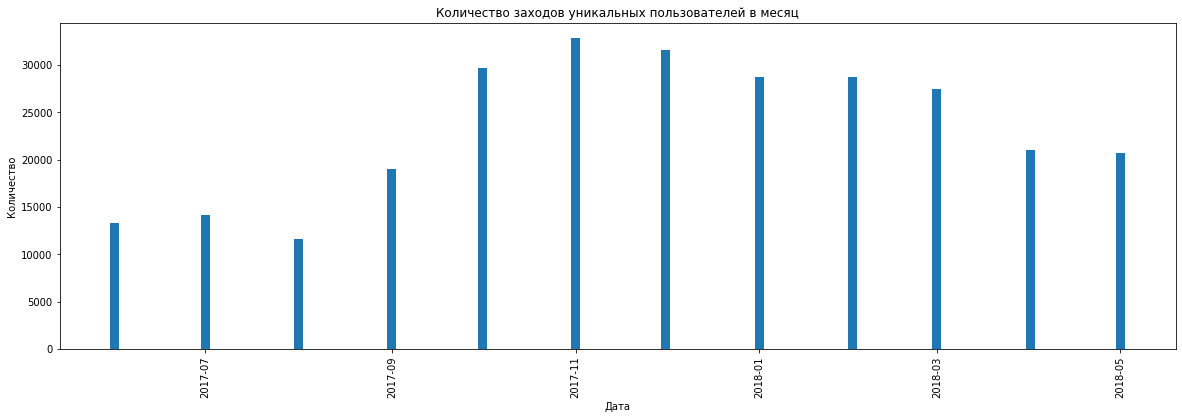

Среднее значение захода уникальных пользователей в месяц за весь период 23228


In [18]:
visits['Activity_month'] = visits['Start_ts'].astype('datetime64[M]')

dftmp=visits.groupby('Activity_month').agg({'Uid':'nunique'})

fig, ax = plt.subplots()
ax.bar(dftmp.index,dftmp.Uid, width = 3)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.xticks(rotation=90)
plt.title('Количество заходов уникальных пользователей в месяц')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

print('Среднее значение захода уникальных пользователей в месяц за весь период {}'.format(round(dftmp.Uid.mean())))

Графики дневных, месячных и недельных заходов имеют одинаковую динамику, чего и следовало ожидать. Ведь это одни и те-же данные, но с разным уровнем группировки. 

### частота заходов

Я понял это задание так, что нам нужно вычислить среднее зчение того, сколько раз в день заходит каждый уникальный пользователь на сайт. Поэтому я группирую сначала по датам с точностью до дня и пользователям и считаю сколько раз данный пользователь заходил в данный день. Следующим шагом я группирую этот список по датам с точностью до дня и считаю среднее значение количества заходов для всех заходивших в этот день.

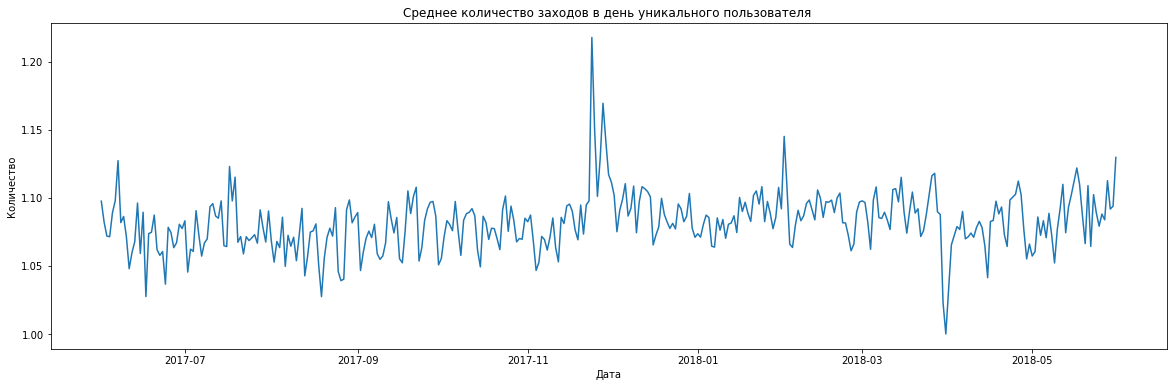

Среднее значение заходов уникального пользователя в день за весь период 1.08


In [19]:
dftmp=visits.groupby(['Date_ts','Uid']).agg({'Device':'count'})
dftmp.reset_index(inplace=True)
dftmp1=dftmp.groupby('Date_ts')['Device'].mean()

fig, ax = plt.subplots()
ax.plot(dftmp1.index,dftmp1)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.title('Среднее количество заходов в день уникального пользователя ')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()
print('Среднее значение заходов уникального пользователя в день за весь период {}'.format(round(dftmp1.mean(),2)))

Значение колеблеться около 1, виден выброс 24.11.2017, который мы видели и на графике DAU

### время на сайте

Здесь нам нужно посмтореть, сколько длиться типичная сессия пользователя.

In [20]:
visits['min_spent']=(visits.End_ts-visits.Start_ts).dt.components.minutes

count    359400.000000
mean          9.386113
std          11.231863
min           0.000000
25%           1.000000
50%           5.000000
75%          13.000000
max          59.000000
Name: min_spent, dtype: float64


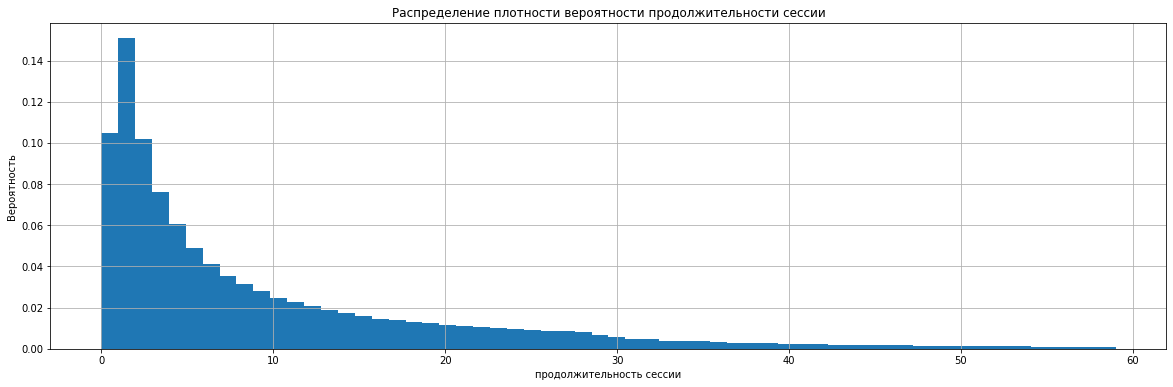

In [21]:
print(visits['min_spent'].describe())

visits['min_spent'].hist(density=True,figsize=(20,6),bins=60)
plt.title('Распределение плотности вероятности продолжительности сессии')
plt.xlabel('продолжительность сессии')
plt.ylabel('Вероятность')
plt.show()


Получаем распределение Пуассона с максимумом около 1 и огромным хвостом вправо. Рассмотрим начальную область более подробно.

Можно брать медиану, или по-взрослому считать мат. ожидание

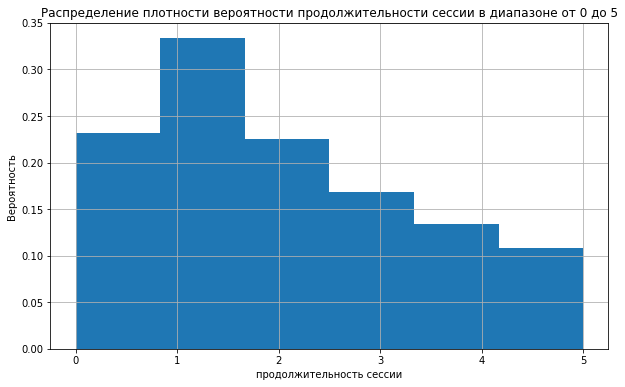

In [22]:
visits['min_spent'].hist(density=True,figsize=(10,6),bins=6,range=(0,5))
plt.title('Распределение плотности вероятности продолжительности сессии в диапазоне от 0 до 5')
plt.xlabel('продолжительность сессии')
plt.ylabel('Вероятность')
plt.show()

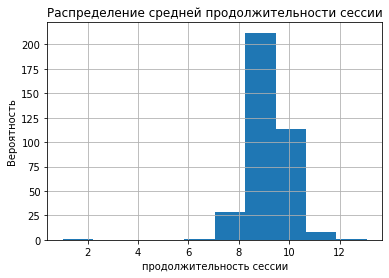

In [23]:
dftmp=visits.groupby('Date_ts')['min_spent'].mean()
dftmp.hist()
plt.title('Распределение средней продолжительности сессии')
plt.xlabel('продолжительность сессии')
plt.ylabel('Вероятность')
plt.show()

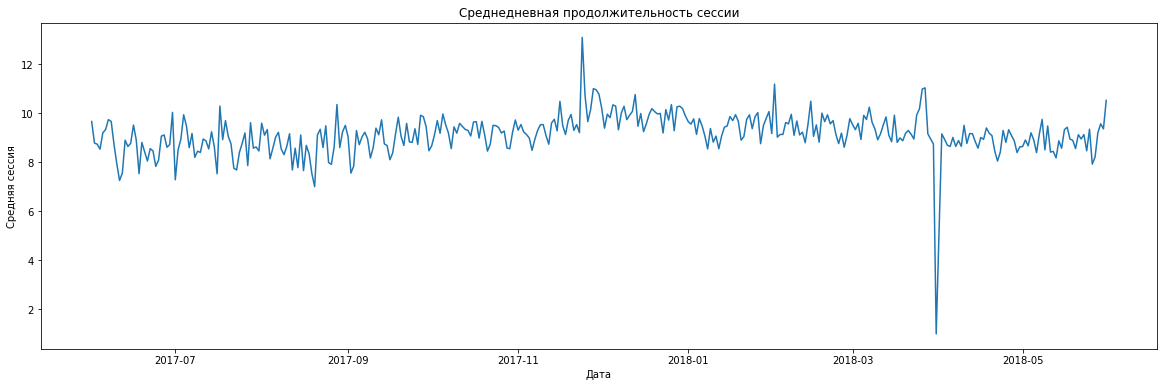

Медиана 5.0


In [24]:
fig, ax = plt.subplots()
ax.plot(dftmp.index,dftmp)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.title('Среднедневная продолжительность сессии')
plt.xlabel('Дата')
plt.ylabel('Средняя сессия')
plt.show()

print('Медиана {}'.format(visits.min_spent.median()))

Получается, что наиболее часто встречающие сессии дляться около минуты, среднее значение около 9 минут, а медиана 5 минут. 

Высокое значение вероятности сессий около минуты означает зашли с конкретным запросом, не увидели нужного, ушли. 

Длинные сессии, скорее всего это просмотр каталога прямо на сайте. 

Чистое среднее малоинформативно, а исходя из медианы можно предположить, что процедура покупки около 5 минут. Но если нужно это выяснить точно, то нужно более подробное исследование с конкретным сравнением интервалов времени сессии и покупки.

### retention rate

В этом пункте мы ищем retention rate с применением когортного анализа. Разбиваем пользователей по месячным когортам. Ищем первое появление пользователя на сайте, и для каждого последующего появления пользователя считаем в какой по номеру период оно происходит

In [25]:
first_event=visits.groupby('Uid')['Start_ts'].min()
first_event.name='First_date'
visits=visits.join(first_event,on='Uid')
visits['Life_start']=visits['First_date'].astype('datetime64[M]')
visits['Lifetime'] = (visits['Activity_month'] - visits['Life_start'])
visits['Lifetime']=(visits['Lifetime']/ np.timedelta64(1,'M')).round()
visits['Lifetime']=visits['Lifetime'].astype('int')

Считаем количество пользователей в каждой когорте, количество пользователй в начальной когорте и вычисляем retention rate

In [26]:
cohorts = (visits.groupby(['Life_start', 'Lifetime']).agg({'Uid': 'nunique'}).reset_index())
inital_users_count = cohorts[cohorts['Lifetime'] == 0][['Life_start', 'Uid']]
inital_users_count = inital_users_count.rename(columns={'Uid': 'cohort_users'})
cohorts = cohorts.merge(inital_users_count, on='Life_start')
cohorts['retention'] = cohorts['Uid'] / cohorts['cohort_users']

Разворачиваем таблицу и рисуем heatmap

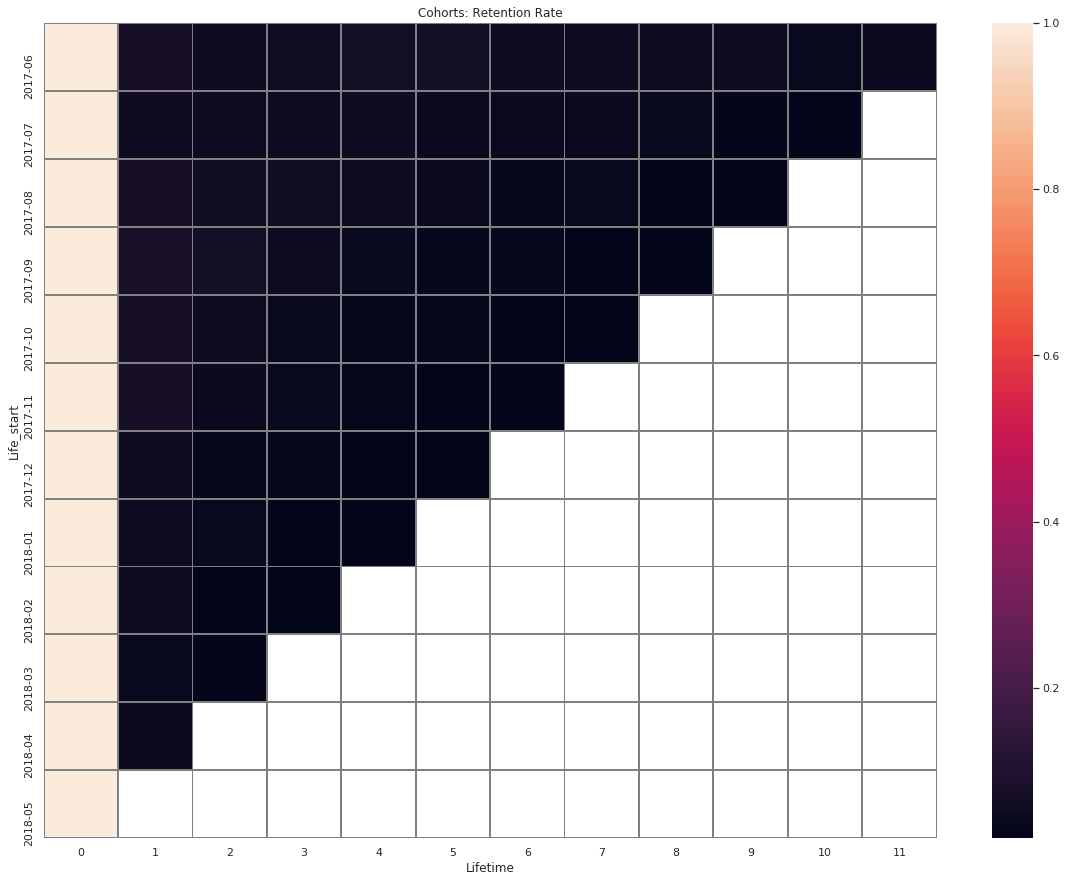

In [27]:
ret_pivot = cohorts.pivot_table(
    index='Life_start',
    columns='Lifetime',
    values='retention',
    aggfunc='sum',
)

sns.set(style='white')
plt.figure(figsize=(20, 15))
plt.title('Cohorts: Retention Rate')
sns.heatmap(ret_pivot, annot=False, fmt='.1%', linewidths=1, linecolor='gray',yticklabels=ret_pivot.index.strftime('%Y-%m'))

Первый столбец имеет слишком большие значения, и в таком масштабе не очень информативно. Уберу первый столбец и еще раз нарисую heatmap.

Средний retention rate для второго месяца жизни когорт 6.52%


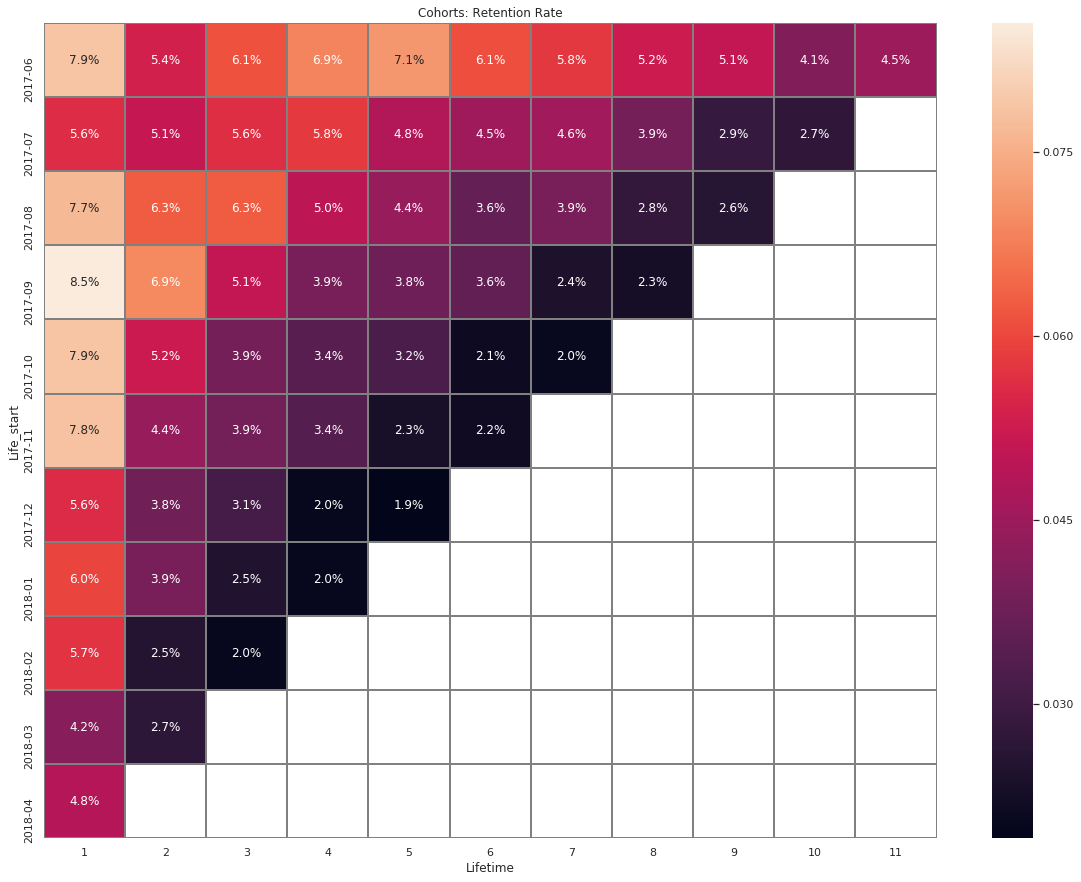

In [28]:
tmp=cohorts[cohorts['Lifetime']!=0]

ret_pivot = tmp.pivot_table(
    index='Life_start',
    columns='Lifetime',
    values='retention',
    aggfunc='sum',
)

sns.set(style='white')
plt.figure(figsize=(20, 15))
plt.title('Cohorts: Retention Rate')
sns.heatmap(ret_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray',yticklabels=ret_pivot.index.strftime('%Y-%m'))

print('Средний retention rate для второго месяца жизни когорт {:.2%}'.format(ret_pivot[1].mean()))

Так выглядит более информативно. Можно рассмотреть динамику изменения показателя. Для вторго месяца жизни когорт retention rate составил 6.52%

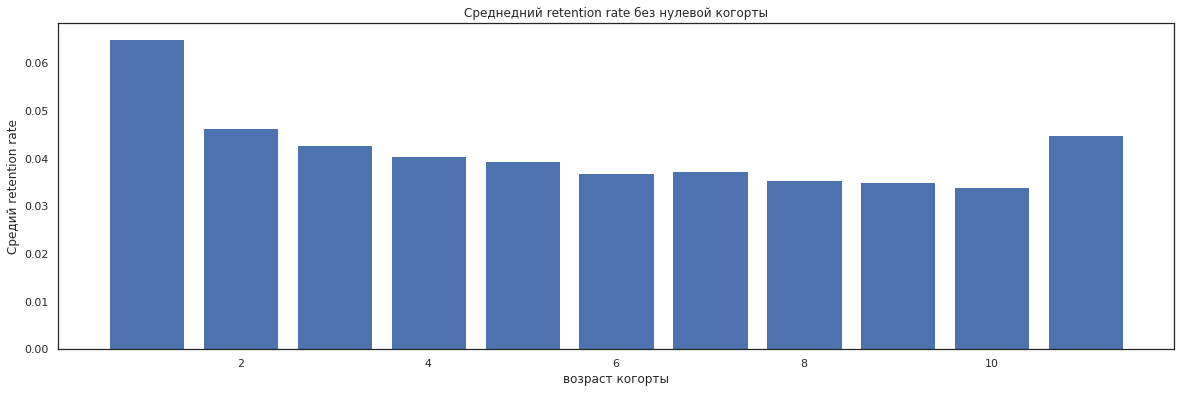

In [29]:
tmp=cohorts[cohorts.Lifetime>0].groupby('Lifetime')['retention'].mean()
fig, ax = plt.subplots()
ax.bar(tmp.index,height=tmp)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.title('Среднедний retention rate без нулевой когорты')
plt.xlabel('возраст когорты')
plt.ylabel('Средий retention rate')
plt.show()

Как мы видим на тепловой карте, retention rate падает и по горизонтальной и по вертикальной оси. Т.е. не только с временем прошедшим после первого захода (т.е. возрастом когорты), но и чем ближе старт когорты к июню 2018. 

На самом деле, для принятия нормального решения нужно больше данных и понимание, как они вообще собираются. Потому-что я вообще не верю, что пользователь, имеющий аккаунт на яндексе и купивший хоть раз билеты в яндекс афише, с вероятностью более 90% (как следует из приведенных данных) при совершении следующей покупки не вернется на яндекс афишу. 
Такой низкий процент возвратов скорее всего и получился потому, что за период в год, однозначно можно идентифицировать только пользователей с аккаунтом. Тогда и анализ надо было проводить с учетом есть/нет авторизация в аккаунте.

## метрики электронной коммерции

### время до покупки

Считаем время между первым входом и первой покупкой. 

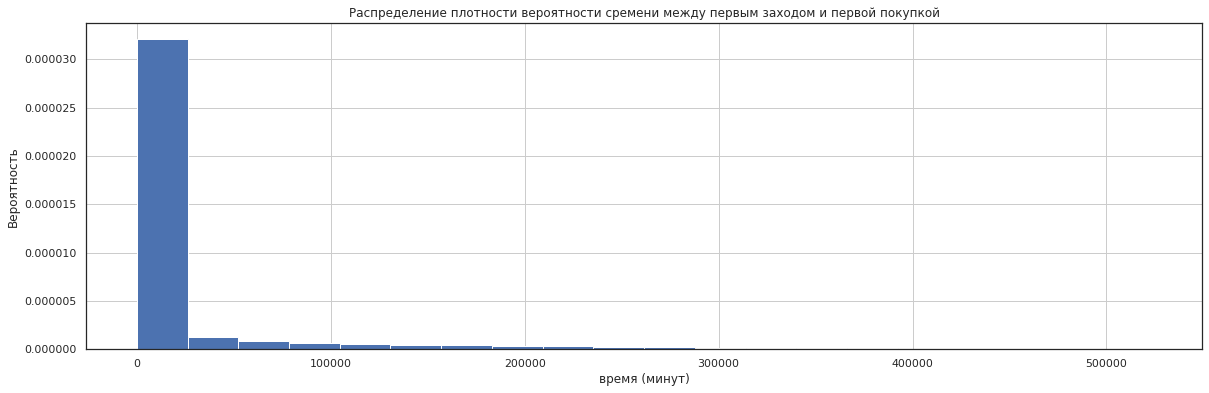

In [30]:
first_enter=visits.groupby('Uid')['Start_ts'].min()
first_enter.name='First_enter_date'
first_buy=orders.groupby('Uid')['Buy_ts'].min()
first_buy.name='First_buy_date'
tmp=pd.DataFrame(first_enter)
tmp=tmp.merge(first_buy, on='Uid')
tmp['Time_delta']=(tmp.First_buy_date-tmp.First_enter_date)
tmp['Time_delta']=tmp['Time_delta'].astype('timedelta64[m]').astype(int)
tmp.Time_delta.hist(density=True,figsize=(20,6),bins=20)
plt.title('Распределение плотности вероятности сремени между первым заходом и первой покупкой')
plt.xlabel('время (минут)')
plt.ylabel('Вероятность')
plt.show()

опять распределение Пуассона с огромным хвостом вправо. Посмотрим на начальную часть подроднее.

Средней мерой можно выбрать медиану.

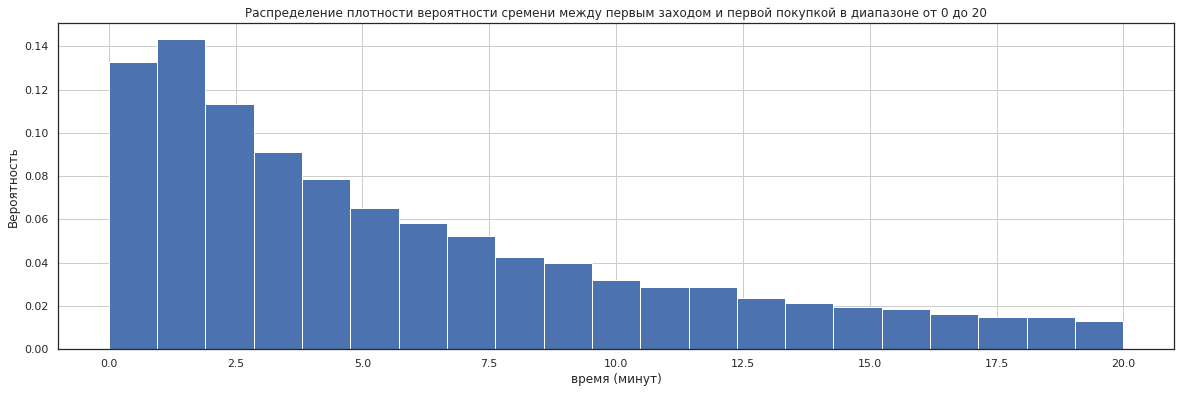

Медиана 16.0


In [31]:
tmp.Time_delta.hist(density=True,figsize=(20,6),bins=21,range=(0,20))
plt.title('Распределение плотности вероятности сремени между первым заходом и первой покупкой в диапазоне от 0 до 20')
plt.xlabel('время (минут)')
plt.ylabel('Вероятность')
plt.show()

print('Медиана {}'.format(tmp.Time_delta.median()))

Наиболее часто встречающееся значение - около 2х минут, а медиана 16. Таким образом среднее, оценочное, время  с момента захода до момента покупки около 16 минут.

### среднее количество покупок на покупателя

Здесь нам необходимо посчитать среднее количество покупок на одного покупателя. Выделим из даты составляющие, они нам пригодяться в дальнейшем.

In [32]:
orders['Date_ts']=orders.Buy_ts.dt.date.astype('datetime64')
orders['Month_ts']=orders.Buy_ts.dt.month
orders['Week_ts']=orders.Buy_ts.dt.week
orders['Year_ts']=orders.Buy_ts.dt.year

Т.к. нам предлягается посчитать за 6 месяцев, то я взял данные только за 2017 год. Сгруппировал их по неделям

In [33]:
tmp=orders[orders['Year_ts']==2017].groupby(['Week_ts','Uid']).agg({'Revenue':'count'})
tmp.reset_index(inplace=True)
tmp1=tmp.groupby('Week_ts').agg({'Revenue':'mean'})

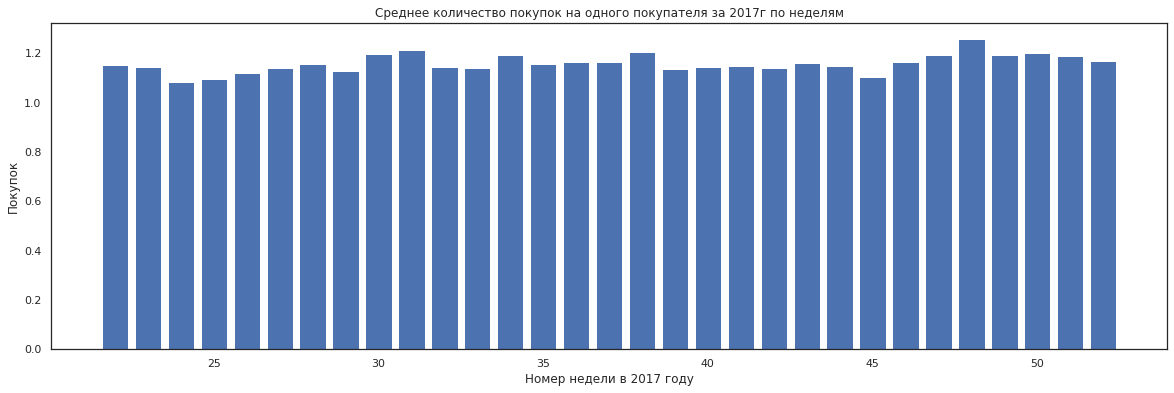

Среднее количество покупок на одного покупателя за 2017г 1.159 в неделю


In [34]:
fig, ax = plt.subplots()
ax.bar(tmp1.index,height=tmp1.Revenue)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.title('Среднее количество покупок на одного покупателя за 2017г по неделям')
plt.xlabel('Номер недели в 2017 году')
plt.ylabel('Покупок')
plt.show()
x=tmp1.Revenue.mean()
print('Среднее количество покупок на одного покупателя за 2017г {:0.3f} в неделю'.format(x))

Каждый уникальный пользователь в среднем покупает один товар в неделю

вычислим даты первых покупок и сформируем когорты помесячно. Эти данные мы будем использовать в дальнейшем, при подсчете LTV и ROMI

In [35]:
first_orders = orders.groupby('Uid')['Date_ts'].min()
first_orders.name='first_order_date'
orders = orders.join(first_orders, on='Uid')
orders['Cohort_num']=orders.first_order_date.astype('datetime64[M]')
orders['Cohort_curr']=orders.Buy_ts.astype('datetime64[M]')
orders['Cohort_age']=orders['Cohort_curr']-orders['Cohort_num']
orders['Cohort_age']=(orders['Cohort_age']/ np.timedelta64(1,'M')).round().astype('int')

Считаем количество уникальных пользователей в каждой когорте ('Uid': 'nunique') и количество покупок ('Revenue': 'count').

In [36]:
cohorts = (
    orders.groupby(['Cohort_num', 'Cohort_curr'])
    .agg({'Uid': 'nunique','Revenue': 'count'})
    .reset_index())
cohorts['age'] = ((cohorts['Cohort_curr'] - cohorts['Cohort_num'])/ np.timedelta64(1,'M')).round().astype('int')
cohorts['buy_count']=cohorts.Revenue/cohorts.Uid


Визуализируем

Среднее значение за 6 месяцев 1.91


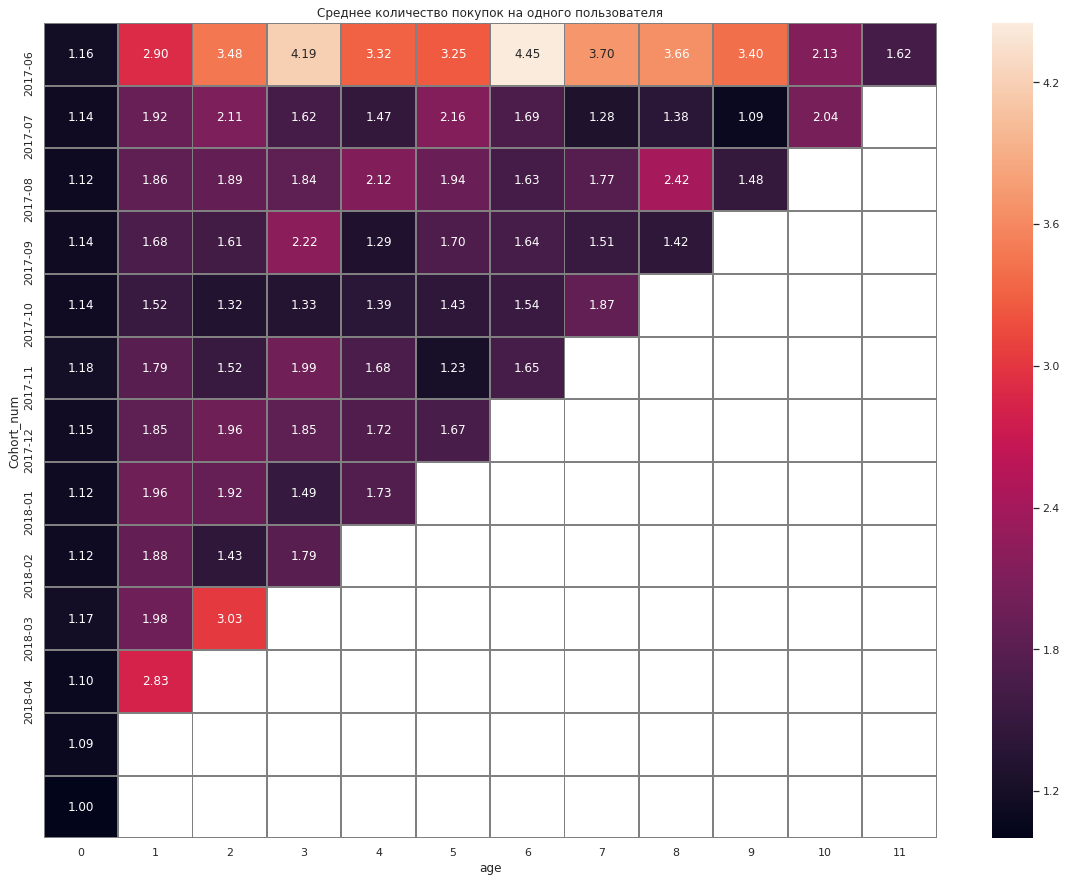

In [37]:
tmp_pivot = cohorts.pivot_table(
    index='Cohort_num',
    columns='age',
    values='buy_count',
    aggfunc='mean',
)

sns.set(style='white')
plt.figure(figsize=(20, 15))
plt.title('Среднее количество покупок на одного пользователя')
sns.heatmap(tmp_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray',yticklabels=ret_pivot.index.strftime('%Y-%m'))

print('Среднее значение за 6 месяцев {:.2f}'.format(tmp_pivot[5].mean()))

Перва когорта самая преданная, и retention rate у нее самый большой и число покупок на пользователя тоже самое большое

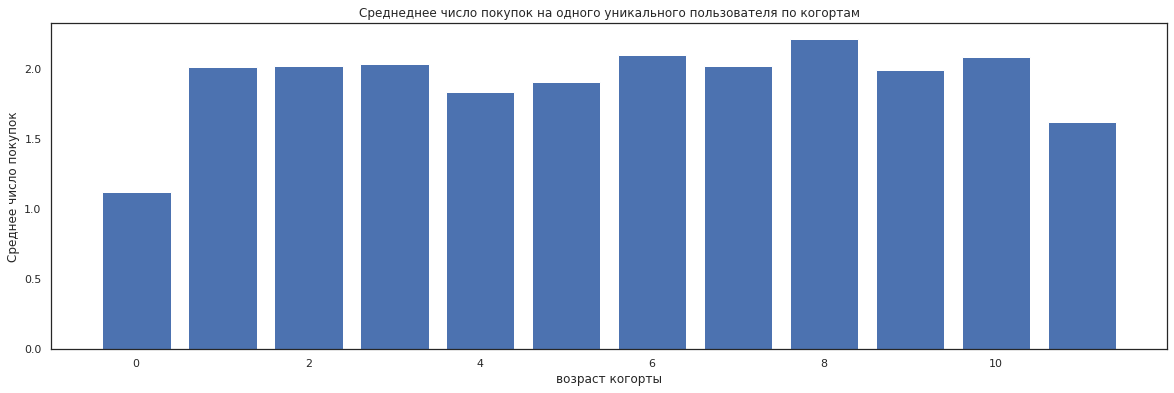

Среднее 1.92


In [38]:
df_tmp=tmp_pivot.mean()
fig, ax = plt.subplots()
ax.bar(df_tmp.index,height=df_tmp)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.title('Среднеднее число покупок на одного уникального пользователя по когортам')
plt.xlabel('возраст когорты')
plt.ylabel('Среднее число покупок')
plt.show()

print('Среднее {:.2f}'.format(df_tmp.mean()))

Для интереса, посчитаем валовое среднее. Возьмем по каждому дню количество уникальных пользователей, количество покупок и вычислим среднее в лоб.

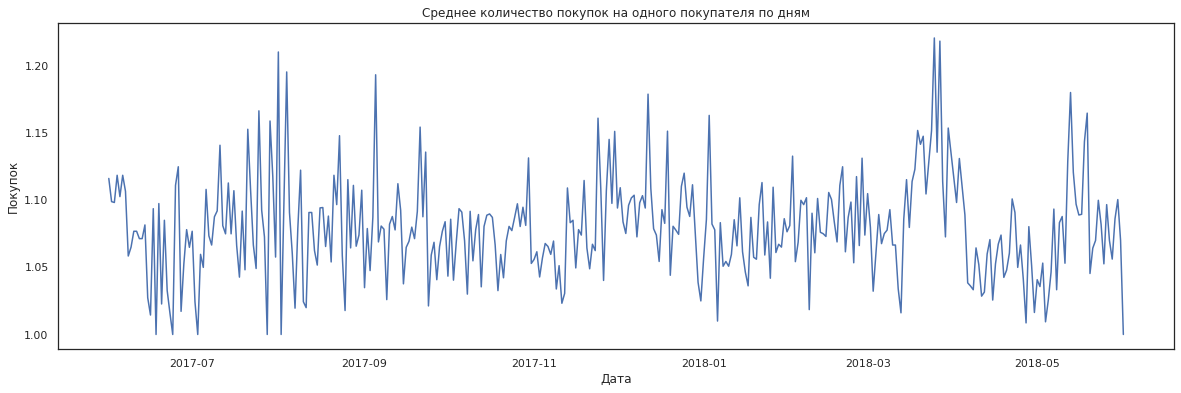

'Валовое среднее 1.08'

In [39]:
tmp=orders.groupby('Date_ts').agg({'Uid': 'nunique','Revenue': 'count'})
tmp['sr']=tmp.Revenue/tmp.Uid
fig, ax = plt.subplots()
ax.plot(tmp.index,tmp.sr)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.title('Среднее количество покупок на одного покупателя по дням')
plt.xlabel('Дата')
plt.ylabel('Покупок')
plt.show()
display('Валовое среднее {:.2f}'.format(tmp.Revenue.sum()/tmp.Uid.sum()))

Колеблется от 1 до 1.2.  Т.е. редко кто покупает больше 1 товара в день. 

### средний чек

Здесь нам необходимо посчитать средний чек, и как сказанно в задании "применяя группировку по времени совершения покупки". Я не совсем понял, что именно хотели этим сказать, поэтому сделал два варианта. Первый - по времени, группируя по часу совершения покупки (т.е. игнорируем дату и на каждый час считаем сумму покупок и количество сессий). Второй - по дням (т.е. на каждый день считаем сумму покупок и количество сессий)

In [40]:
orders['Time_ts']=orders.Buy_ts.dt.time
orders['Hour_ts']=orders.Buy_ts.dt.hour

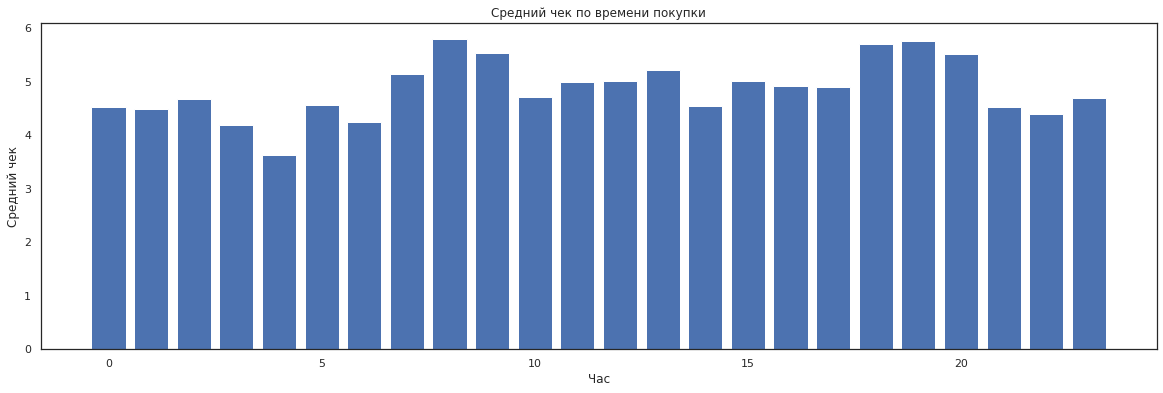

In [41]:
tmp=orders.groupby('Hour_ts').agg({'Uid':'count','Revenue':'sum'})
tmp['Med_rev']=tmp.Revenue/tmp.Uid

fig, ax = plt.subplots()
ax.bar(tmp.index,height=tmp.Med_rev)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.title('Средний чек по времени покупки')
plt.xlabel('Час')
plt.ylabel('Средний чек')
plt.show()

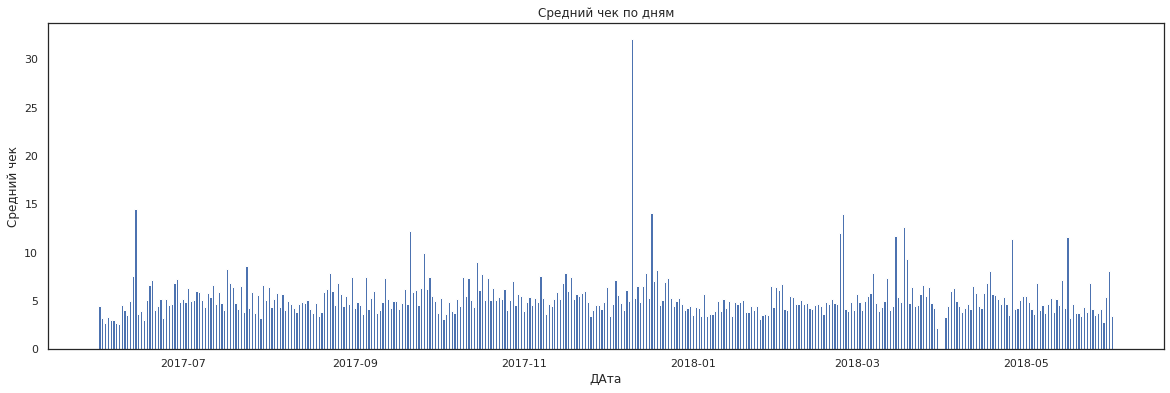

In [42]:
tmp=orders.groupby('Date_ts').agg({'Uid':'nunique','Revenue':'sum'})
tmp['Med_rev']=tmp.Revenue/tmp.Uid

fig, ax = plt.subplots()
ax.bar(tmp.index,height=tmp.Med_rev)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.title('Средний чек по дням')
plt.xlabel('ДАта')
plt.ylabel('Средний чек')
plt.show()

выброс 10.12.2017 портит масштаб, уберу его и построю график еще раз

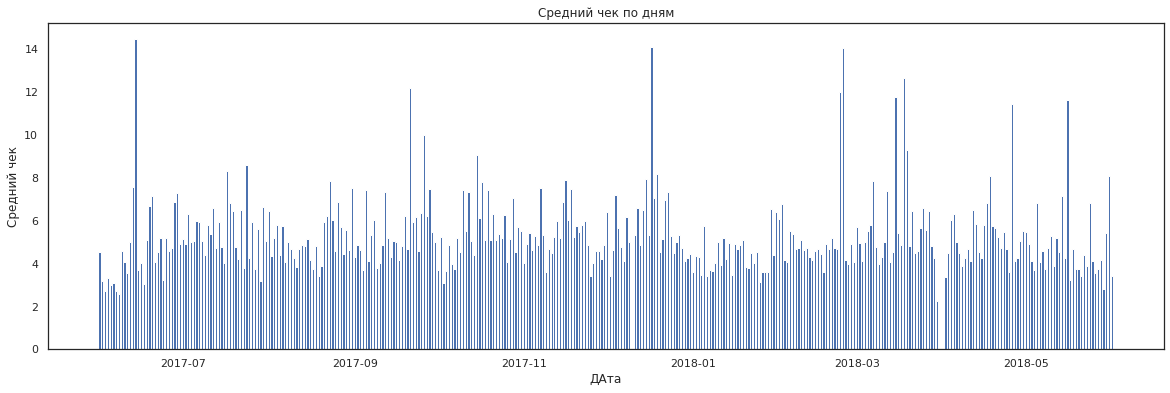

In [43]:
tmp[tmp.index=='2017-12-10']=0

fig, ax = plt.subplots()
ax.bar(tmp.index,height=tmp.Med_rev)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.title('Средний чек по дням')
plt.xlabel('ДАта')
plt.ylabel('Средний чек')
plt.show()

Невижу какой-либо зависимости среднего чека от дня. Колеблется вокруг 4. Нет даже заметного влияния инфляции за анализируемый период. 

Выбросы, видимо, вызванны выходом в продажу каких-то дорогих товаров (в данном случае дорогостоящих концертов).Очень популярное, ожидаемое мероприятие -> как правило высокая цена и скупка билетов в один день, иначе не хватит -> выброс.

Нет даже особой привязки к праздничным дням. Но это в принципе объяснимо, т.к. билеты на праздничный концерт не покупаются все в один день, кроме особо популярных концертов, спрос на которые высок. 

### LTV по когортам

Считаем LTV, применяя когортный анализ. Разбивать будем по месяцам. Выбираем даты первых покупок, считаем номер когорты для текущих покупок и срок между первой и текущей покупкой в терминах когортного анализа.

Следующий блок закоментирован и оставлен просто для ознакомления, т.к. это все было вычисленно выше при посчете среднего числа покупок.

In [44]:
#first_orders = orders.groupby('Uid')['Date_ts'].min()
#first_orders.name='first_order_date'
#orders = orders.join(first_orders, on='Uid')
#orders['Cohort_num']=orders.first_order_date.astype('datetime64[M]')
#orders['Cohort_curr']=orders.Buy_ts.astype('datetime64[M]')
#orders['Cohort_age']=orders['Cohort_curr']-orders['Cohort_num']
#orders['Cohort_age']=(orders['Cohort_age']/ np.timedelta64(1,'M')).round().astype('int')

считаем размер начальной когорты

In [45]:
cohort_sizes = (
    orders[orders.Cohort_age==0].groupby('Cohort_num')
    .agg({'Uid': 'nunique'})
    .reset_index())

соединяем все вместе и считаем показатели

In [46]:
cohorts = (
    orders.groupby(['Cohort_num', 'Cohort_curr'])
    .agg({'Revenue': 'sum'})
    .reset_index())

report = pd.merge(cohort_sizes, cohorts, on='Cohort_num')

margin_rate=1

report['gp'] = report['Revenue'] * margin_rate
report['age'] = ((report['Cohort_curr'] - report['Cohort_num'])/ np.timedelta64(1,'M')).round().astype('int')
report['ltv'] = report['gp'] / report['Uid']
result = report.pivot_table(index='Cohort_num', columns='age', values='ltv', aggfunc='mean')

result_cum=result.cumsum(axis=1)

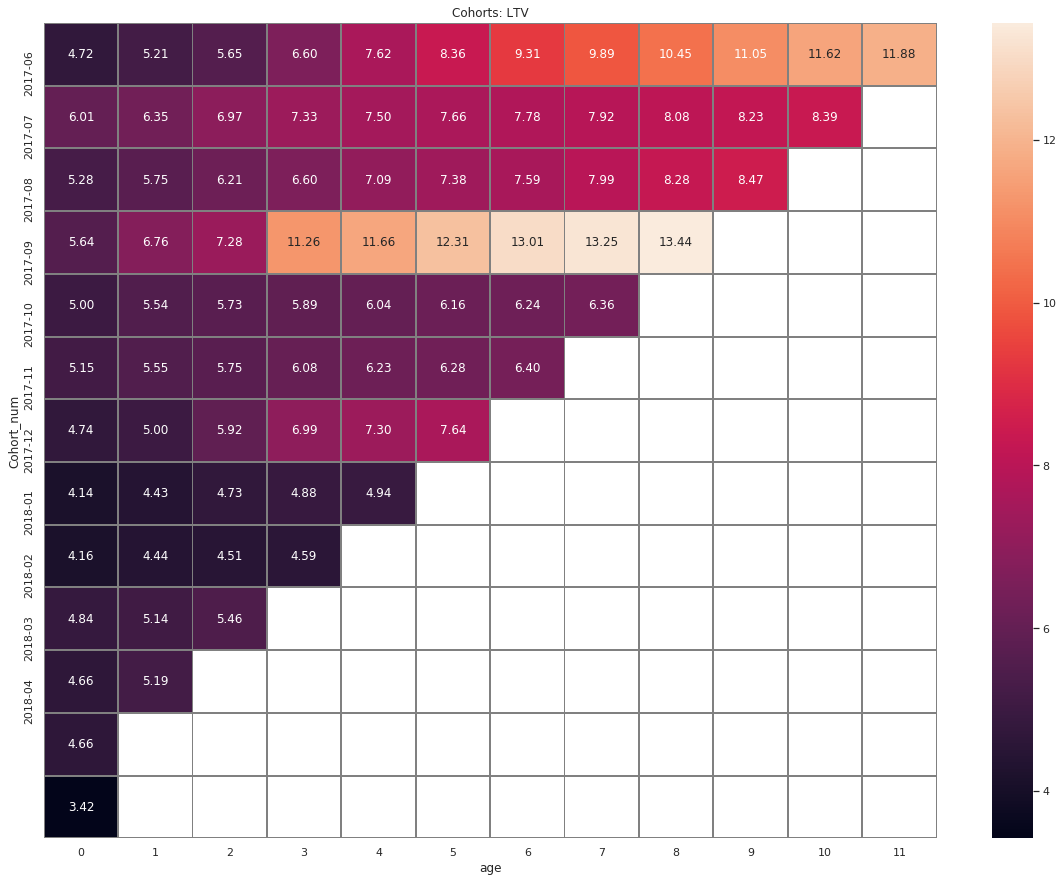

In [47]:
sns.set(style='white')
plt.figure(figsize=(20, 15))
plt.title('Cohorts: LTV')
sns.heatmap(result_cum, annot=True, fmt='.2f', linewidths=1, linecolor='gray',yticklabels=ret_pivot.index.strftime('%Y-%m'))

А это данные уже с накоплением. У нас есть интересный момент с двумя последними когортами 2018-05 и 2018-06. В последней когорте (2018-06) всего один пользователь с Uid=83872787173869366 его особенность в том, что он начал сессию 31.05.2018 в 23:59 а закончил ее 01.06.2018, и покупка прошла 6 месяцем. Формально как бы ожидается, при наличии когорты с 6 месяцем второй месяц для когорты 2018-05. Но его не может быть, т.к. данных за 6 месяц нет. 

In [48]:
tmp=report.pivot_table(index='Cohort_num', columns='age', values='ltv', aggfunc='mean')  #[report.Cohort_num<='2017-11-01']
tmp=tmp.cumsum(axis=1)
m6_cum_ltv = tmp.mean(axis=0)[5] 
print('Средний LTV за шесть месяцев составил {:.2f}'.format(m6_cum_ltv))

Средний LTV за шесть месяцев составил 7.97


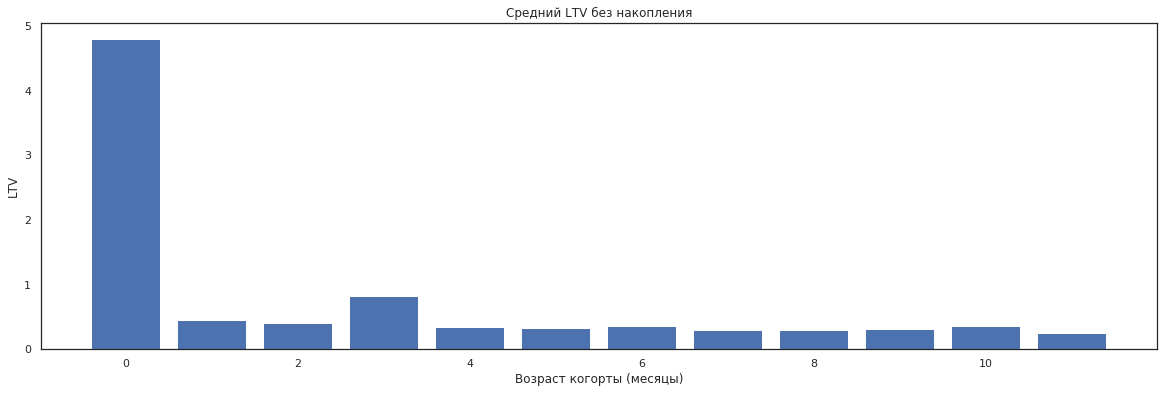

In [49]:
cum_ltv=result.mean(axis=0)
fig, ax = plt.subplots()
ax.bar(cum_ltv.index,cum_ltv)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.title('Средний LTV без накопления')
plt.xlabel('Возраст когорты (месяцы)')
plt.ylabel('LTV')
plt.show()


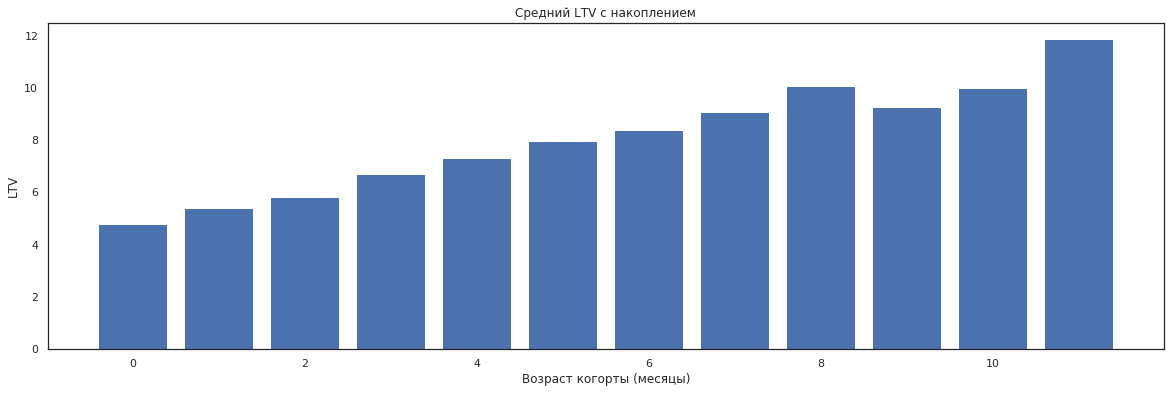

In [50]:
cum_ltv=tmp.mean(axis=0)
fig, ax = plt.subplots()
ax.bar(cum_ltv.index,cum_ltv)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.title('Средний LTV c накоплением')
plt.xlabel('Возраст когорты (месяцы)')
plt.ylabel('LTV')
plt.show()

Когорта со стартом 2018-06-01 возникла по той причине, что сессия пользователя была начата в 23:59 31.05.2018 и оконченна 00:04 01.06.2018 а покупка была зарегистрированна 00:02 01.06.2018. Данная когорта нам не нужна, т.к. никаких данных, кроме этого одного события за период с 01.06.2018 нет. Можно либо выкинуть это событие, либо перенести в 31.05.2018. На результатах в целом это не отразится.

## маркетинговые метрики

### общие расходы

В этом пункте мы считаем, сколько было потраченно на маркетинг, в разрезе источников.

Сумма расходов на маркетинг для источника 1 составила 20833.27
Сумма расходов на маркетинг для источника 2 составила 42806.04
Сумма расходов на маркетинг для источника 3 составила 141321.63
Сумма расходов на маркетинг для источника 4 составила 61073.60
Сумма расходов на маркетинг для источника 5 составила 51757.10
Сумма расходов на маркетинг для источника 9 составила 5517.49
Сумма расходов на маркетинг для источника 10 составила 5822.49
Итого расходов на маркетинг 329131.62


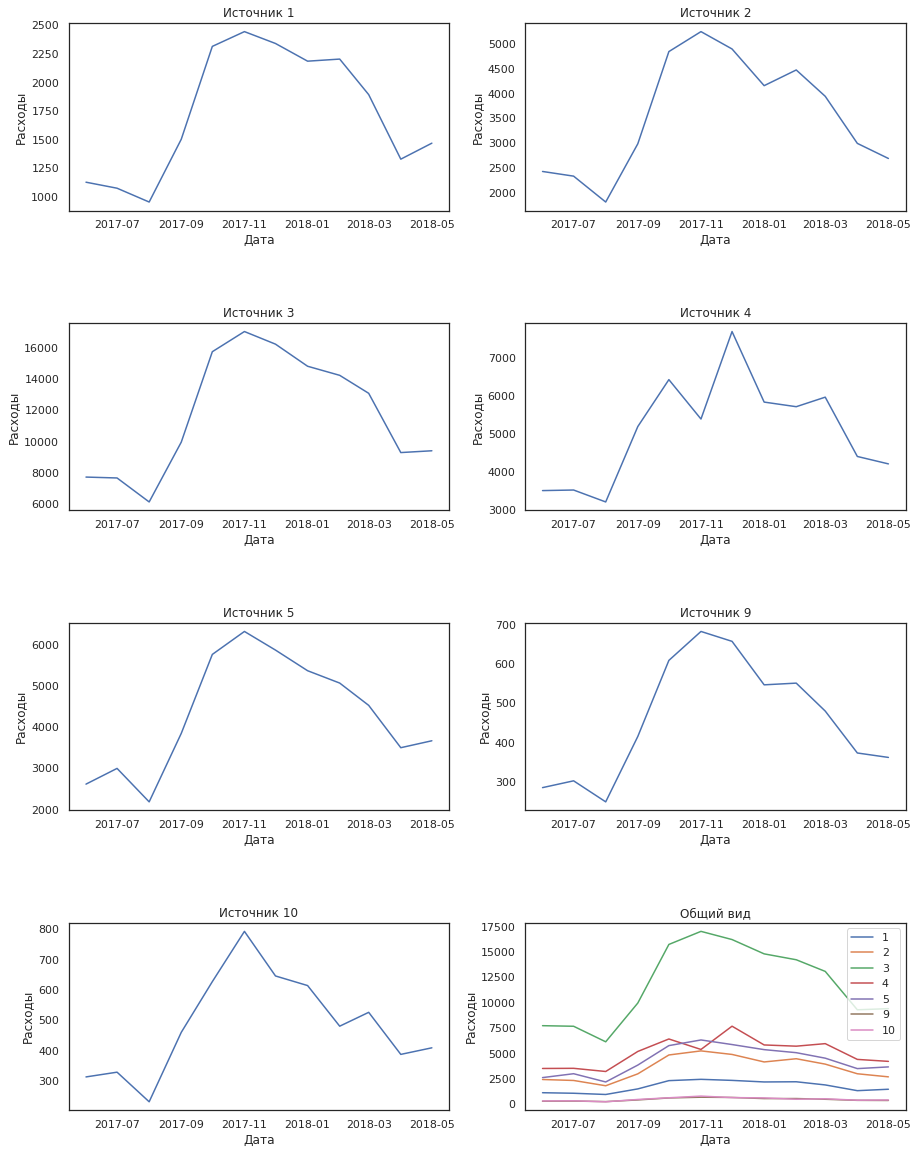

In [51]:
costs['Life_start']=costs['dt'].astype('datetime64[M]') 

tmp=costs.groupby(['source_id'])['costs'].sum()

fig, ax = plt.subplots(ncols=2,nrows=4,figsize=(15,20) )
plt.subplots_adjust(hspace=0.6)
i=0
j=0
sid=0
for el,s in tmp.items():    
    sid=el
    print('Сумма расходов на маркетинг для источника {} составила {:.2F}'.format(el,s))
    df=costs[costs['source_id']==el].groupby('Life_start')['costs'].sum()
    ax[i][j].plot(df.index,df)
    ax[i][j].set_xlabel('Дата')
    ax[i][j].set_ylabel('Расходы')
    ax[i][j].set_title('Источник '+str(el))
    ax[3][1].plot(df.index,df,label=el)
    if j==0:
        j=j+1
    else:
        j=0
        i=i+1 
print('Итого расходов на маркетинг {:.2f}'.format(tmp.sum()))
ax[3][1].set_xlabel('Дата')
ax[3][1].set_ylabel('Расходы')
ax[3][1].set_title('Общий вид')
ax[3][1].legend()
plt.show()



Все затраты имеют примерно одинаковую динамику, но на общем графике, в одном масштабе видно насколько сильно различаются общие суммы. 

### CAC

В этом пунтке, нам нужно посчитать стоимость привлечения новых клиентов в разрезе источников помесячно. Группируем затраты по источникам и месяцам. Считаем заходы уникальных пользователей с группировкой по источникам и месяцам. Соединяем и считаем отношение.

In [52]:
# получаем источник для первого захода
first_source = visits.groupby('Uid').agg({'Date_ts':'min','Source_id':'first'})
first_source=first_source.reset_index()

#добавляем в orders источник, дата первого захода уже есть
orders=pd.merge(orders,first_source[['Uid','Source_id']],how='inner',left_on='Uid',right_on='Uid')

# группируем затраты по источникам и месяцам
costs_gr=costs.groupby(['source_id','Life_start']).agg({'costs':'sum'}).reset_index()
costs_gr=costs_gr.rename(columns={'source_id':'Source_id'})

# группируем заказы по источникам и месяцам, что нам дает привлеченных клиентов в разразе источников
orders_gr=orders.groupby(['Source_id','Cohort_num']).agg({'Uid':'nunique'}).reset_index()
orders_gr=orders_gr.rename(columns={'Cohort_num':'Life_start'})

# собираем все вместе
cac=pd.merge(costs_gr,orders_gr,on=['Source_id','Life_start'],how='inner', suffixes=['_and', '_or'])
cac['CAC']=cac.costs/cac.Uid


Визуализируем

CAC для проeкта в целом составил 9.0121
Сумма расходов на привлечение одного нового посетителя для источника 1 составила 5.60
Сумма расходов на привлечение одного нового посетителя для источника 2 составила 10.09
Сумма расходов на привлечение одного нового посетителя для источника 3 составила 15.88
Сумма расходов на привлечение одного нового посетителя для источника 4 составила 6.69
Сумма расходов на привлечение одного нового посетителя для источника 5 составила 7.55
Сумма расходов на привлечение одного нового посетителя для источника 9 составила 4.30
Сумма расходов на привлечение одного нового посетителя для источника 10 составила 5.26


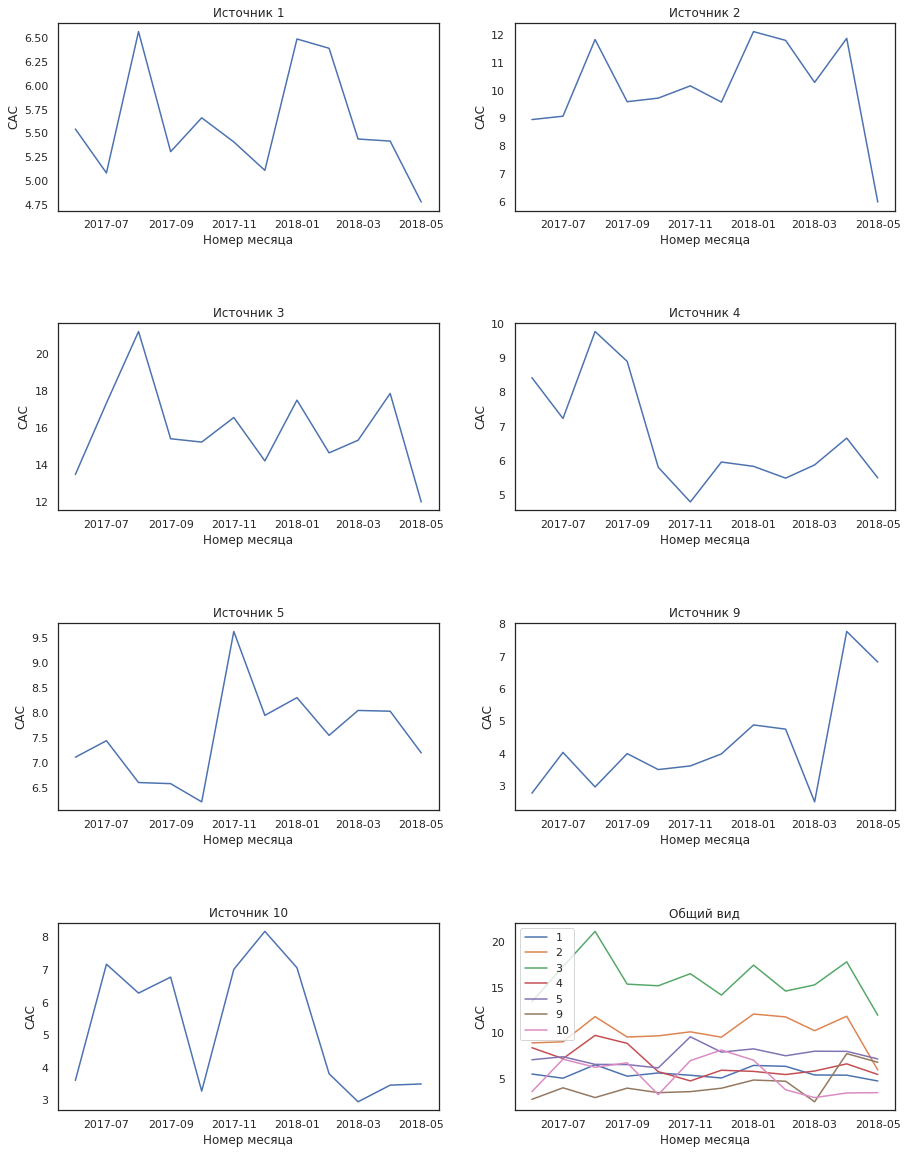

In [53]:
tmp=cac.groupby('Source_id').CAC.mean()

fig, ax = plt.subplots(ncols=2,nrows=4,figsize=(15,20) )
plt.subplots_adjust(hspace=0.6)
i=0
j=0
print('CAC для проeкта в целом составил {:.4F}'.format((cac.costs.sum())/cac.Uid.sum()))
for el,s in tmp.items():    
    print('Сумма расходов на привлечение одного нового посетителя для источника {} составила {:.2F}'.format(el,s))
    df=cac[cac['Source_id']==el].groupby('Life_start')['CAC'].sum()
    ax[i][j].plot(df.index,df)
    ax[i][j].set_xlabel('Номер месяца')
    ax[i][j].set_ylabel('CAC')
    ax[i][j].set_title('Источник '+str(el))
    ax[3][1].plot(df.index,df,label=el)
    if j==0:
        j=j+1
    else:
        j=0
        i=i+1 
ax[3][1].set_xlabel('Номер месяца')
ax[3][1].set_ylabel('CAC')
ax[3][1].set_title('Общий вид')
ax[3][1].legend()
plt.show()

Стоимость привлечения нового пользователя имеет странную, на мой взгляд динамику. Расходы на маркетинг, по всем источникам росли до декабря 2017 и затем стали падать. Этим, видимо и объясняется падение CAC в конце периода.

Снижение стоимости привлечения новых клиентов в районе 11 и 12 месяцев 2017 года, не смотря на то, что в этот момент расходы на маркетинг были на максимуме может быть обоснованно увеличением количества новых клиентов. 

Источник 3 имеет подавляюще большой бюджет, и самую высокую стоимость привлечения.

Источник 9 явно перестал работать, т.к. не смотря на снижение расходов, стоимость каждого нового клиента выросла в 2 раза, по сравнению с предидущим периодом.

Источник 10 начал работать с марта 2018. Потому, что несмотря на снижение расходов, стоимость привлечения упала более чем в 2 раза, по сравнению с предидущим периодом.

### ROMI

Сначала посчитаем ROMI для всего проекта. У нас уже есть таблица с LTV, без разбивки по источникам, добавим туда расходы и вычислим показатель.

In [54]:
monthly_costs=costs.groupby('Life_start').costs.sum()

report_new = pd.merge(
    report, monthly_costs, left_on='Cohort_num', right_on='Life_start'
)
report_new['cac'] = report_new['costs'] / report_new['Uid']
report_new['romi'] =report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
    index='Cohort_num', columns='age', values='romi', aggfunc='mean'
)
output=output.cumsum(axis=1).round(2) 


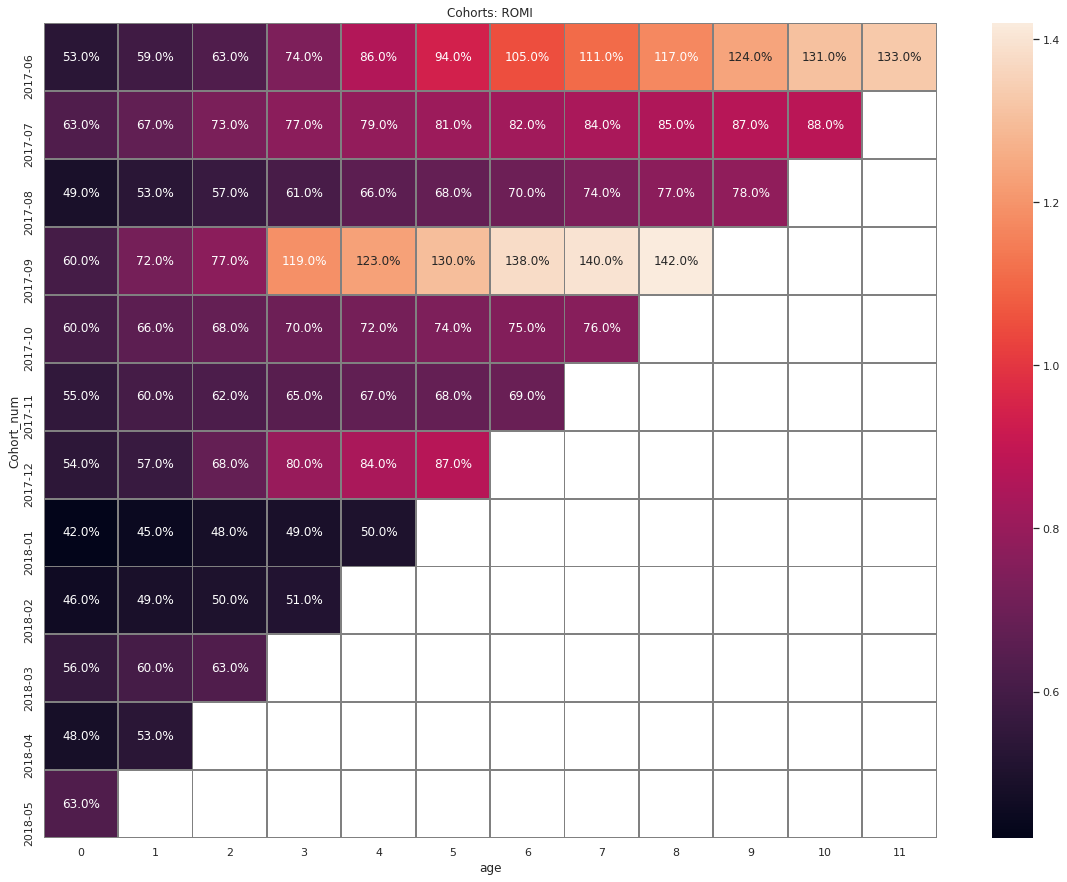

In [55]:
sns.set(style='white')
plt.figure(figsize=(20, 15))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, fmt='.1%', linewidths=1, linecolor='gray',yticklabels=output.index.strftime('%Y-%m'))

Теперь сделаем то-же самое, но в разрезе источников.

In [56]:
 
#считаем размеры начальных когорт в разрезе источников
s_cohort_sizes = (orders[orders.Cohort_age==0].groupby(['Source_id','Cohort_num']).agg({'Uid': 'nunique'}).reset_index())

#считаем доход по когортам с учетом иcточников
s_cohorts = (orders.groupby(['Source_id','Cohort_num', 'Cohort_curr']).agg({'Revenue': 'sum'}).reset_index())

#собираем вместе начальные размеры и все когорты
s_report = pd.merge(s_cohort_sizes, s_cohorts, on=(['Source_id','Cohort_num']))

#считаем показатели
margin_rate=1
s_report['gp'] = s_report['Revenue'] * margin_rate
s_report['age'] = ((s_report['Cohort_curr'] - s_report['Cohort_num'])/ np.timedelta64(1,'M')).round().astype('int')
s_report['ltv'] = s_report['gp'] / s_report['Uid']

#добавляем CAC из ранее подсчитанной в пункте 6.2 таблицы
s_romi=pd.merge(s_report,cac,how='left',left_on=['Source_id','Cohort_num'],right_on=['Source_id','Life_start'])
s_romi['ROMI']=s_romi.ltv/s_romi.CAC



визуализируем

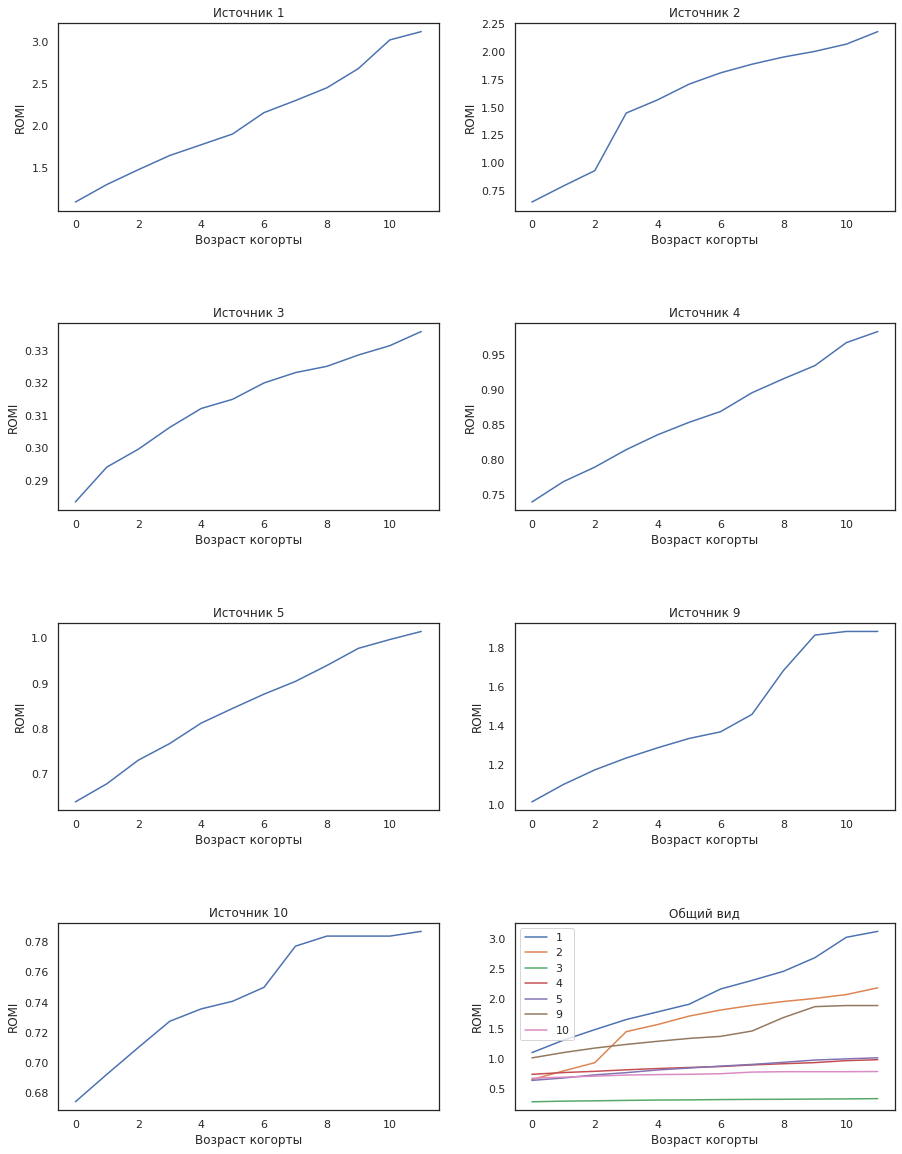

In [57]:
# строим сводную таблицу
tmp2=s_romi.pivot_table(index=['Source_id'],columns='age',values='ROMI',aggfunc='mean')

#
tmp2=tmp2.fillna(0)

# сделал новую таблицу с накопленными суммами, т.к. хотел оставить исходную таблицу нетронутой
tmp3=tmp2.cumsum(axis=1)

# 
tmp3=tmp3.reset_index()
tmp3=tmp3.set_index('Source_id')

# получаем список источников рекламных компаний для итерации
ls=tmp3.index.unique()

fig, ax = plt.subplots(ncols=2,nrows=4,figsize=(15,20) )
plt.subplots_adjust(hspace=0.6)
i=0
j=0
for el in ls:   
    df=tmp3[tmp3.index==el]
    df=df.stack().reset_index()
    df=df.set_index('age')
    df=df.drop('Source_id',axis=1)
    ax[i][j].plot(df.index,df)
    ax[i][j].set_xlabel('Возраст когорты')
    ax[i][j].set_ylabel('ROMI')
    ax[i][j].set_title('Источник '+str(el))
    ax[3][1].plot(df.index,df,label=el)
    if j==0:
        j=j+1
    else:
        j=0
        i=i+1 
ax[3][1].set_xlabel('Возраст когорты')
ax[3][1].set_ylabel('ROMI')
ax[3][1].set_title('Общий вид')
ax[3][1].legend()
plt.show()

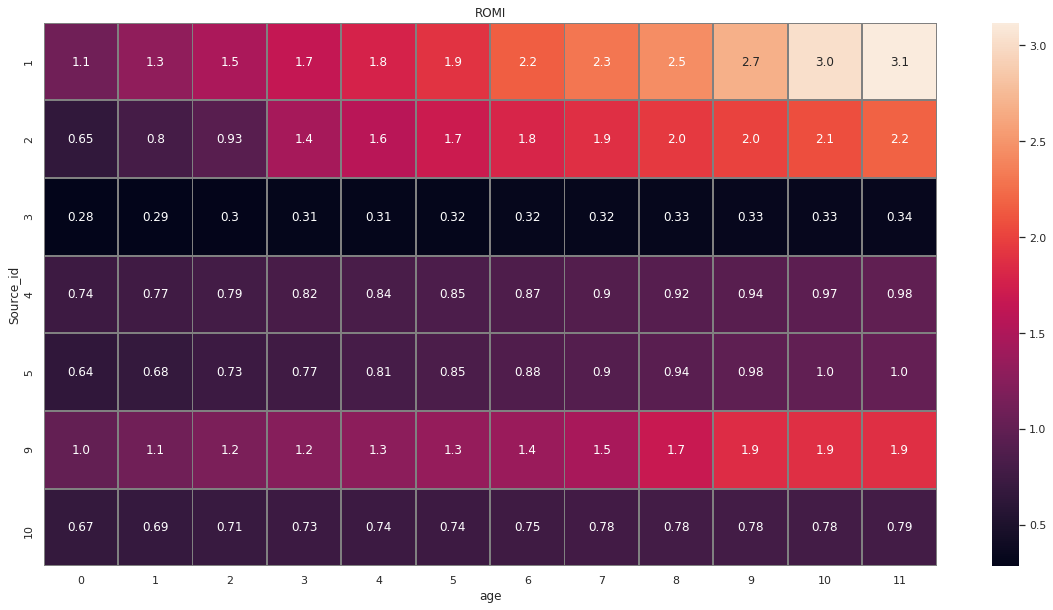

In [58]:
sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('ROMI')
sns.heatmap(tmp3, annot=True, fmt='.2', linewidths=1, linecolor='gray')

Как мы можем видеть, источники 3,4 и 10 так и не окупились, источник 5 только вышел на окупаемость, источники 1 и 9 окупились прямо со старта, источник 2 вышел на окупаемость с 3 месяца.

### пользователи

хочу посмотреть, сколько пользователей было привлеченно в разрезе источников

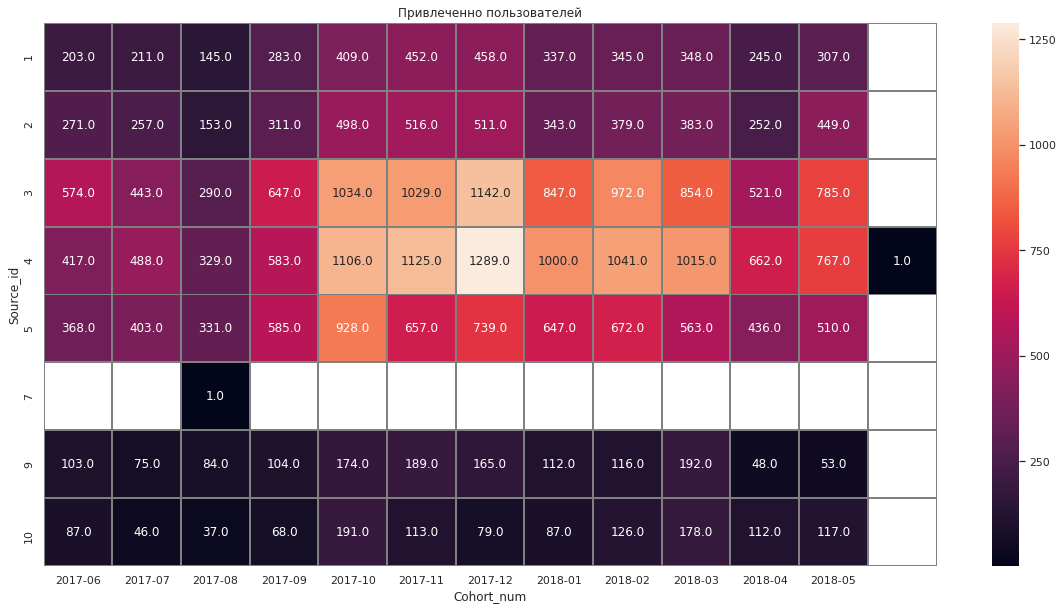

In [59]:
tt=orders.groupby(['Source_id','Cohort_num']).agg({'Uid':'nunique'})
tt_piv=tt.pivot_table(index='Source_id',columns='Cohort_num',values='Uid',aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Привлеченно пользователей')
sns.heatmap(tt_piv, annot=True, fmt='0000',linewidths=1, linecolor='gray',xticklabels=output.index.strftime('%Y-%m'))

## вывод

#### анализ источников траффика

Проанализировав предоставленные данные, в части перспективных источников траффика, можно сделать следующие выводы:

 Источник 1 
   - продолжать, ROMI>1 со старта, и он по-прежнему приносит много пользователей

 Источник 2 
   - продолжать, ROMI стал >1 уже с 3 месяца, и он по-прежнему приносит много пользователей
 
 Источник 3 
   - прекратить либо уменьшить расходы на эту компанию, либо сосвсем бросить. Он приносит больше всех пользователей, но дохода нет. Это приемлимо на начальном этапе, когда нужно завоевать популярность, но не сейчас. Проблема этой рекламной компании в ее высокой стоимости.
 
 Источник 4 
   - продолжать. Самая перспективная на мой взгляд компания. Вторая после компании 3 по числу привлеченных пользователей и вот-вот выйдет на окупаемость. Бросать ее сейчас недопустимо. 
 
 Источник 5 
   - продолжать. Она в пятерке компаний по количеству привлеченных пользователей и уже вышла на окупаемость.
 
 Источник 9 
   - продолжать. Пользователей с нее мало, но она окупается.
 
 Источник 10 
   -прекратить. На окупаемость она так и не вышла и динамика привлеченных пользователей не дает оснований надеяться, что выйдет.

#### Анализ данных в разрезе метрик 

##### маркетинговые метрики

Анализ маркетинговых показателей CAC, LTV и ROMI дает нам следущее:
    
 1. средняя стоимость привлечения нового клиента около 9. 
 2. Общие затраты на маркетинг - 329131.62. 
 3. Привлеченно уникальных пользователей 36523. 
 4. Суммарный доход 252057.2. 
    
 Таким образом, проект в целом на окупаемость не вышел. Расходы на маркетинг превышают полученную прибыль.

##### продуктовые метрики

Анализ продуктовых метрик дает нам следующиее значения:

 1. заходов уникальных пользователей в день/неделю/месяц - 908/5716/23228
 2. в среднем пользователи заходят на сайт 1 раз в день.
 3. в среднем пользователи проводят на сайте около 8 минут.
 4. retention rate составляет 5-7% для второго месяца и имеет тенденцю к снижению с возрастом когорты.
 

#####  метрики эл. коммерции

Метрики эл. коммерции имеют следующии значения:

 1. среднее время от первого захода до первой покупки составляет около 16 минут.
 2. значительная (26%) часть сессий от захода до покупки имеет продолжительность 2 минуты и меньше.
 3. среднее количество покупок на клиента не более 1 в день и около 2 за месяц.
 4. средний чек около 4.
 5. LTV по когортам ожидаемо растет с увеличением возраста когорты
 6. имеются две очень продуктивных когорты, идущие с 6 и 9 месяца 2017г. И две провальные когорты начавшиеся с 1 и 2 месяца 2018г.
 

#### Анализ данных когортного анализа

Анализ данных когортного анализа показывает следующее:

  1. Все когорты постепенно выходят на прибыль.
  2. На данный момент прибыльными стали 1 и 3 когорты.
  3. Сравнительно провальными являются когорты от января и февраля 2018г, даже по сравнению с другими месяцами 2018г.